In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import ttest_1samp, shapiro
from sklearn.feature_selection import chi2

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.metrics import recall_score, make_scorer, roc_auc_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from graphviz import Source
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG, display
# import shap

import warnings
warnings.filterwarnings('ignore')
from scipy.stats.mstats import winsorize
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score
import pandas as pd
from sklearn.preprocessing import PowerTransformer
from sklearn.decomposition import PCA
# from pycaret.classification import *
import lightgbm as lgb
from sklearn.metrics import recall_score
import six
import sys
sys.modules['sklearn.externals.six'] = six
# from skopt.space import Real, Integer, Categorical
# from skopt import gp_minimize, space
from functools import partial

In [ ]:
df = pd.read_csv('/content/sample_data/Best_dataset_fp.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
X = df.drop(['TenYearCHD'], axis = 1)
y = df['TenYearCHD']
X = X.reset_index(drop=True)

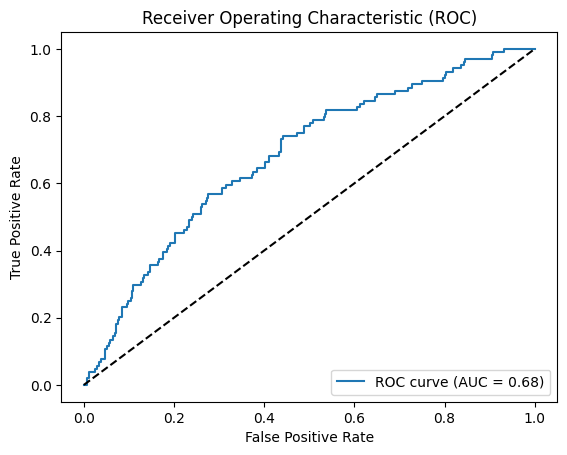

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming you have your features stored in X and labels in y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Naive Bayes classifier
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

# Predict probabilities for the test data
y_prob = naive_bayes.predict_proba(X_test)[:, 1]  # Probability of positive class

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC (Area Under the Curve) score
auc_score = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


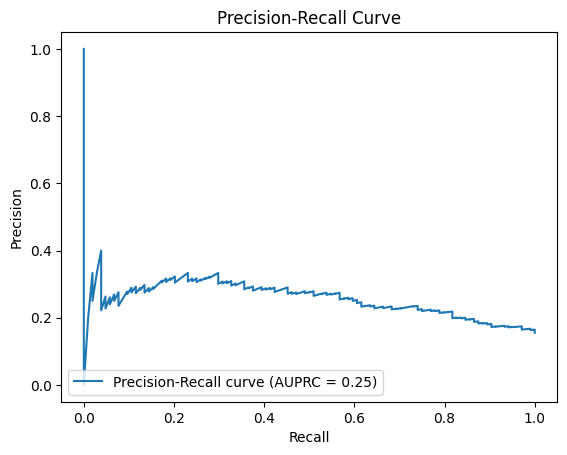

In [ ]:
from sklearn.metrics import precision_recall_curve, auc
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Naive Bayes classifier
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

# Predict probabilities for the test data
y_prob = naive_bayes.predict_proba(X_test)[:, 1]  # Probability of positive class

# Calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)

# Calculate AUPRC (Area Under the Precision-Recall Curve) score
auprc_score = auc(recall, precision)

# Plot precision-recall curve
plt.plot(recall, precision, label='Precision-Recall curve (AUPRC = {:.2f})'.format(auprc_score))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

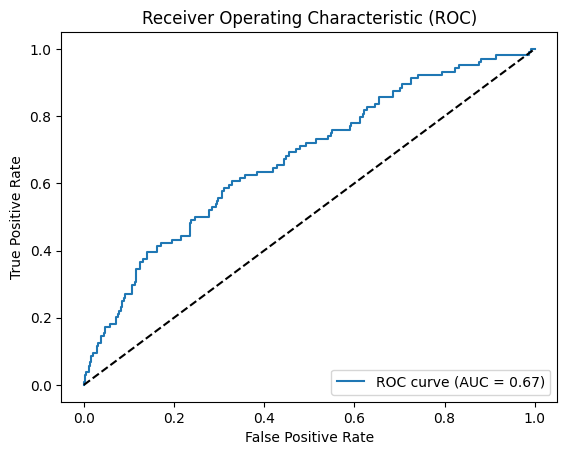

In [ ]:

# Define the parameters
params = {'max_depth': 3,
          'n_estimators': 173,
          'learning_rate': 0.26658391864937014,
          'subsample': 0.27417395433428393,
          'colsample_bytree': 0.37678704205444047,
          'min_child_weight': 8.827872937189104}


# Train the model
model = lgb.LGBMClassifier(**params)
model.fit(X_train, y_train)


# Predict probabilities for the test data
y_prob = model.predict_proba(X_test)[:, 1]  # Probability of positive class

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC (Area Under the Curve) score
auc_score = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()
